## Introduction to regression
-  In regression tasks, the target value is a ***continuously varying variable***, such as a country's GDP or the price of a house.

### Boston HousingData
- we ```load``` it from a comma-separated values file, also known as a csv file, using pandas' read csv function.
- Note that you can also ```load this data from scikit-learn's built-in datasets```.

In [38]:
boston = pd.read_csv('./dataset/boston.csv')
print(boston.shape)
boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The documentation tells us the feature 
- ```'CRIM'``` is per capita crime rate,
- ```'NX'``` is nitric oxides concentration, and 
- ```'RM'``` average number of rooms per dwelling, for example.
- The target variable, ```'MEDV'```, is the median value of owner occupied homes in thousands of dollars.

### Creating feature and target arrays
scikit-learn wants ```'features'``` and ```'target'``` values in distinct arrays, ```X``` and ```y```,. Thus, we split our DataFrame.

In [39]:
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

### Predicting house value from a single feature
- let's try to predict the price from a single feature: ***the average number of rooms in a block***

In [43]:
X_rooms = X[:,5]

In [42]:
print(type(y))
print(type(X_rooms))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
print(X_rooms.shape)
print(y.shape)

(506,)
(506,)


To turn them into NumPy arrays of the desired shape, we apply the reshape method to keep the first dimension, but add another dimension of size one to X.

In [51]:
y = y.reshape(-1,1)
print(y.shape)
X_rooms = X_rooms.reshape(-1,1)
print(X_rooms.shape)

(506, 1)
(506, 1)


### Plotting house value vs. number of rooms

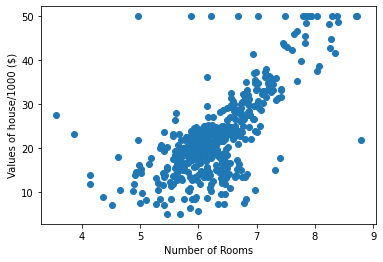

In [53]:
plt.scatter(X_rooms, y)
plt.ylabel('Values of house/1000 ($)')
plt.xlabel('Number of Rooms')
plt.show()

### Fitting a regression model

In [56]:
#importing the nescessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

#making linear model & fitting it
reg = LinearRegression()
reg.fit(X_rooms, y)

LinearRegression()

- we want to check out the ***regressors predictions** over the range of the data. We can achieve that by using **np linspace between the maximum and minimum number of rooms*** and make a prediction for this data.

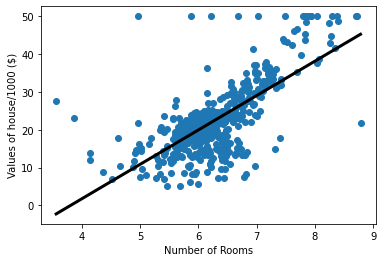

In [57]:
#making a linspace
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

#plotting line space on graph
plt.scatter(X_rooms, y)
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('Values of house/1000 ($)')
plt.xlabel('Number of Rooms')
plt.show()

**QUESTION: Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem**

- An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item.

- A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant.

- A restaurant using review data to ascribe positive or negative sentiment to a given review.

- A bike share company using time and weather data to predict the number of bikes being rented at any given hour.

- The target variable here - the number of bike rentals at any given hour - is quantitative, so this is best framed as a regression problem.

## Regression mechanics
We want to fit a line to the data and a line in two dimensions is always of the form
- y = ax + b
- where **y** is the target,
- **x** is the single feature, and 
- **a** and **b** are the parameters of the model that we want to learn

### how do we choose a and b? 
A common method is to define an **error function for any given line** and then to **choose the line that minimizes the error function**. Such an error function is also called a ```loss or a cost function```

### What will our loss function be?
- Intuitively, we want the **line to be as close to the actual data** points as possible.
- For this reason, we wish to **minimize the vertical distance** between the fit and the data.
- So for each data point,we calculate the vertical distance between it and the line. This distance is called a ```residual```.
- Now, we could try to minimize the sum of the residuals,but then a large positive residual would cancel out a large negative residual.
- For this reason we minimize the sum of the squares of the residuals! This will be our loss function and using this loss function is commonly called ordinary least squares, or OLS for short.
- When you call fit on a linear regression model in scikit-learn, it performs this OLS under the hood.

**=>** To explore more about [**loss function**](https://drive.google.com/file/d/18duswCHmQJTn5F9XRAgcXAh6MpkKCoqY/view?usp=sharing)

# Practise

#### 1- Importing data for supervised learning - ```Regression```

- dataset <a href = "https://www.gapminder.org/data/">Gapminder </a>
- goal will be to use this data to ```predict the life expectancy``` in a given country based on features such as the country's ```GDP, fertility rate, and population```.
- Since the target variable here is quantitative, this is a regression problem.
- To begin, you will fit a linear regression with just one feature: ```'fertility'```, which is ***the average number of children a woman in a given country gives birth*** to.

In [68]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('./dataset/gm_2008_region.csv')

# Create arrays for features and target variable
X = df.fertility
y = df.life

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.values.reshape(-1,1)
X_reshaped = X.values.reshape(-1,1)

# NOTICE: Great work! Notice the differences in shape before and after applying the .reshape() method. 
# Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


#### Exploring the Gapminder data
-  It is important to explore your data before building models. On the right, we have constructed a heatmap.
- Cells that are in ```green show positive correlation```, while cells that are in ```red show negative correlation```.

- Take a moment to explore this: Which features are positively correlated with ```'life'```, and which ones are negatively correlated? 
- Does this match your intuition?

In [69]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [70]:
#removing irrelevant column
df.drop('Region', axis = 1 , inplace= True)

In [71]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [72]:
df_columns = df.columns
df_columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality'],
      dtype='object')

In [73]:
df.shape

(139, 9)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


In [75]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [76]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


<AxesSubplot:>

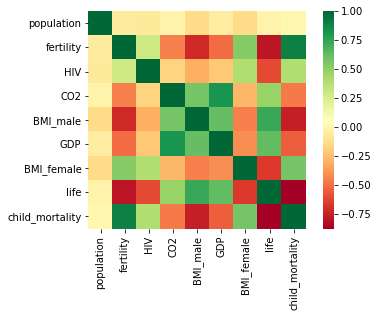

In [77]:
#importing library
import seaborn as sns

#making a plot
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

#### Which of the FOllowings are True ?
- The DataFrame has **139** samples (or rows) and **9** columns.

- ```'life'``` and ```'fertility'``` are negatively correlated.

- The mean of life is **69.602878**.

- ```'fertility'``` is of type **int64**.

- ```'GDP'``` and ```'life'``` are positively correlated.

#### 2- Fit & predict for regression

- you will use the ```'fertility'``` feature of the Gapminder dataset.
- Since the goal is to predict life expectancy, the target variable here is ```'life'```. 
- The array for the target variable has been pre-loaded as y and the array for ```'fertility'``` has been pre-loaded as ```X_fertility```.
- A scatter plot with ```'fertility'``` on the x-axis and ```'life'``` on the y-axis has been generated.
- As you can see, there is a ***strongly negative correlation***, so a linear regression should be able to capture this trend.

In [78]:
X_fertility = X_reshaped #renaming this for better understanding

Your job is to ***fit*** a linear regression and then ***predict*** the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the  score using scikit-learn's ```.score()``` method.

0.6192442167740035


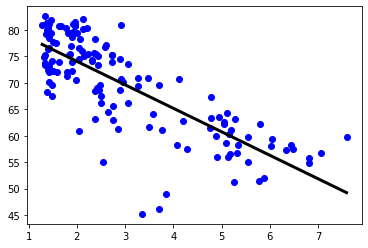

In [79]:
import matplotlib.pyplot as plt
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))


# Plot regression line
plt.scatter(X_fertility, y, color='Blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


#### Train/test split for regression
- you will ```split the Gapminder dataset``` into training and testing sets, and then ```fit and predict a linear regression over``` all features.
- In addition to ```computing the R^2 score```, you will ```also compute the Root Mean Squared Error (RMSE)```, which is another **commonly used metric** to evaluate regression models. 

In [11]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


#### 5-fold cross-validation
- Cross-validation is a vital step in evaluating a model. It ***maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data***.

In [20]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_reshaped, y_reshaped,cv =  5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


#### K-Fold CV comparison

In [22]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X_reshaped, y_reshaped, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X_reshaped, y_reshaped, cv = 10)
print(np.mean(cvscores_10))


0.6294715754653507
0.5883937741571185


In the IPython Shell, you can use ```%timeit``` to see how long each ```3-fold CV``` takes compared to ```10-fold CV``` by executing the following cv=3 and cv=10:

In [24]:
%timeit cross_val_score(reg, X_reshaped, y_reshaped, cv = 3)

4.62 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Regularization I: Lasso
- you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients.
- Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

[-1.51388042]


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

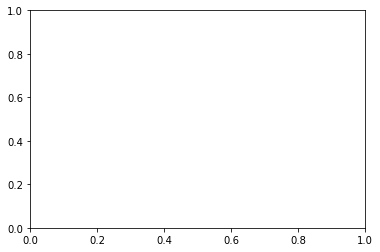

In [31]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize = True)

# Fit the regressor to the data
lasso.fit(X_reshaped,y_reshaped)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

#### Regularization II: Ridge
- Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

- Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as ```L1 regularization``` because the regularization term is the  norm of the coefficients. This is not the only way to regularize, however.

- If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the ```L2 norm```. this is also known as ```L2 regularization```

In [33]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

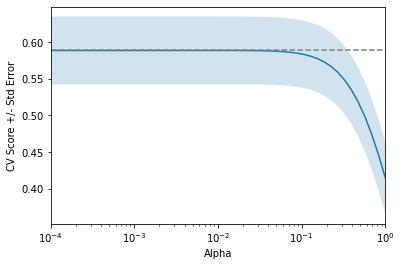

In [34]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize= True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_reshaped, y_reshaped, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
